# 📊 Model Evaluation: Accuracy, Precision, Recall, Confusion Matrix

✅ Images loaded: (413, 550) (413, 550, 3)


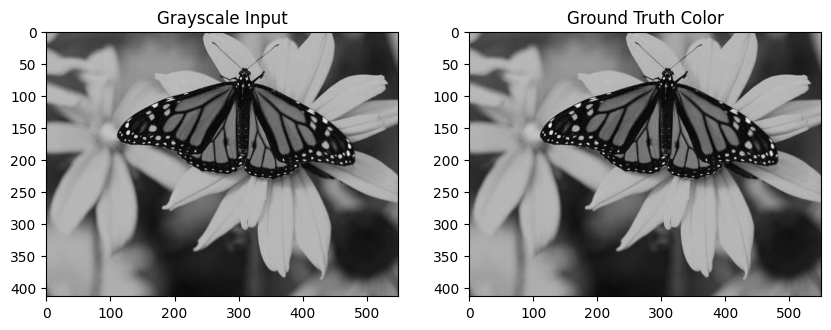

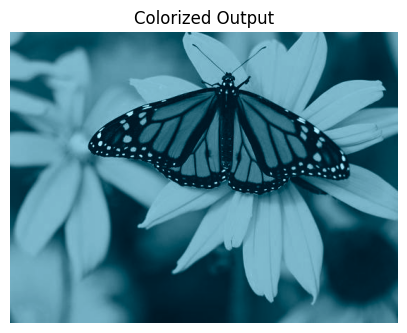

MSE: 1142.9313
PSNR: 17.55 dB
SSIM: 0.8420


In [4]:
# 🖼️ Image Colorization Evaluation (PSNR, SSIM, MSE)

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim, mean_squared_error as mse

from colorize import compose_rules, ensure_gray

# 🔹 Load Grayscale and Ground Truth Color Images
gray_img_path = "test_gray.png"   # <-- replace with your grayscale image path
gt_color_path = "test_gray.png"  # <-- replace with your ground truth color image path

gray_img = cv2.imread(gray_img_path, cv2.IMREAD_GRAYSCALE)
gt_color = cv2.imread(gt_color_path)

if gray_img is None or gt_color is None:
    raise FileNotFoundError("Update paths: test_gray.png / test_color.png not found")

print("✅ Images loaded:", gray_img.shape, gt_color.shape)

# Show inputs
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray_img, cmap="gray")
plt.title("Grayscale Input")
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(gt_color, cv2.COLOR_BGR2RGB))
plt.title("Ground Truth Color")
plt.show()

# 🔹 Run Colorization
dummy_mask = np.ones_like(gray_img, dtype=np.float32)  # whole image
rules = [
    {"mask": dummy_mask, "color": (120, 180, 200), "intensity": 1.0, "feather": 0, "enabled": True}
]

colorized = compose_rules(gray_img, rules, mode="blend")

plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(colorized, cv2.COLOR_BGR2RGB))
plt.title("Colorized Output")
plt.axis("off")
plt.show()

# 🔹 Compute PSNR, SSIM, and MSE
gt_resized = cv2.resize(gt_color, (colorized.shape[1], colorized.shape[0]))

colorized_rgb = cv2.cvtColor(colorized, cv2.COLOR_BGR2RGB)
gt_rgb = cv2.cvtColor(gt_resized, cv2.COLOR_BGR2RGB)

mse_val = mse(gt_rgb, colorized_rgb)
psnr_val = psnr(gt_rgb, colorized_rgb, data_range=255)
ssim_val = ssim(gt_rgb, colorized_rgb, channel_axis=2)

print(f"MSE: {mse_val:.4f}")
print(f"PSNR: {psnr_val:.2f} dB")
print(f"SSIM: {ssim_val:.4f}")
